## 신경망 개요
# 텐서플로 분류(Classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'1.12.0'

In [4]:
sess = tf.InteractiveSession()

### 이진 분류 (iris)
- 입력값 : sepal_length, petal_length
- 목표값 : setosa(0), versicolor(1)

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

- 활성화함수: sigmoid
- 비용함수 : binary cross entropy

In [60]:
X = tf.constant(iris.data[:100,[0,2]], dtype=tf.float32)
y = tf.constant(iris.target[:100].reshape(-1,1), dtype=tf.float32) # one-hot-encoding

w = tf.Variable(tf.random.normal([2,1], 0, 0.1))
b = tf.Variable(tf.random.normal([], 0, 0.1))

pred_y = tf.nn.sigmoid(X@w + b)
entropy = -tf.reduce_mean(y*tf.log(pred_y) + (1-y)*tf.log(1-pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs = []
tf.global_variables_initializer().run()

for i in range(20000):
    entropy_val, _ = sess.run([entropy, train_op])
    costs.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 0.6719518
1000 0.11375226
2000 0.061552092
3000 0.042748023
4000 0.033024933
5000 0.027059358
6000 0.0230124
7000 0.020078981
8000 0.017850418
9000 0.016096953
10000 0.01467925
11000 0.013507993
12000 0.01252303
13000 0.011682458
14000 0.010956125
15000 0.010321847
16000 0.009762806
17000 0.00926609
18000 0.008821682
19000 0.008421485
19999 0.008059413


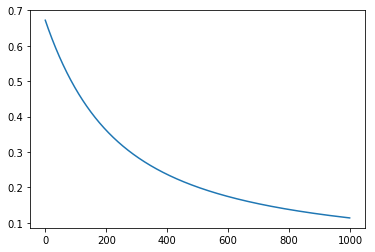

In [61]:
plt.plot(costs[:1000])

In [67]:
pred_y_val = tf.cast(pred_y>0.5, dtype=tf.int32).eval()
pred_y_val

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [70]:
(pred_y_val.ravel() == iris.target[:100]).mean()

1.0

In [73]:
(pred_y_val == iris.target[:100].reshape(-1,1)).mean()

1.0

- 출력층 노드 : 클래스 갯수만큼 생성
- 활성화함수 : sotfmax
- 비용함수 : cross entropy

In [8]:
X = tf.constant(iris.data[:100,[0,2]], dtype=tf.float32)
y = tf.constant(np.eye(2)[iris.target[:100]], dtype=tf.float32) # one-hot-encoding

w = tf.Variable(tf.random.normal([2,2], 0, 0.1))
b = tf.Variable(tf.random.normal([2], 0, 0.1))

pred_y = X@w + b
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y,
                                        logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs = []
tf.global_variables_initializer().run()

for i in range(10000):
    entropy_val, _ = sess.run([entropy, train_op])
    costs.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 0.7418177
1000 0.061824787
2000 0.033101384
3000 0.023052936
4000 0.01787795
5000 0.014700377
6000 0.012540335
7000 0.010970881
8000 0.009775722
9000 0.008833187
9999 0.008070231


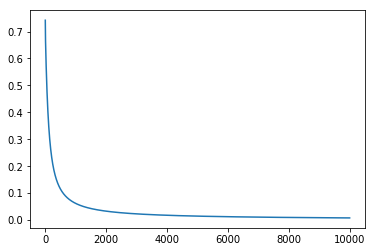

In [10]:
plt.plot(costs)

In [13]:
pred_y_val = pred_y.eval().argmax(axis=1)
pred_y_val

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [21]:
iris.target[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
(pred_y_val == iris.target[:100]).mean()

1.0

In [20]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(iris.data[:100,[0,2]], iris.target[:100])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
model.score(iris.data[:100,[0,2]], iris.target[:100])

1.0

In [35]:
model.coef_, model.intercept_

(array([[-1.40943548,  2.98712545]]), array([-0.54940999]))

In [36]:
w.eval(), b.eval()

(array([[ 1.0984415, -1.1366781],
        [-2.4144557,  2.3967621]], dtype=float32),
 array([ 0.50747734, -0.50701463], dtype=float32))

### 다중 분류 (속성 2개)
- 품종 3개 모두 사용
- 속성은 2개로 제한

In [38]:
X = tf.constant(iris.data[:,[0,2]], dtype=tf.float32)
y = tf.constant(np.eye(3)[iris.target], dtype=tf.float32) # one-hot-encoding

w = tf.Variable(tf.random.normal([2,3], 0, 0.1))
b = tf.Variable(tf.random.normal([3], 0, 0.1))

pred_y = X@w + b
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs = []
tf.global_variables_initializer().run()

for i in range(30000):
    entropy_val, _ = sess.run([entropy, train_op])
    costs.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 1.1331406
1000 0.43622026
2000 0.3526747
3000 0.30618033
4000 0.27541906
5000 0.25347504
6000 0.23703186
7000 0.22425173
8000 0.21402931
9000 0.20566072
10000 0.19867685
11000 0.1927538
12000 0.18766075
13000 0.18322921
14000 0.17933291
15000 0.17587583
16000 0.17278354
17000 0.16999738
18000 0.16747092
19000 0.16516638
20000 0.16305308
21000 0.16110583
22000 0.15930367
23000 0.15762898
24000 0.15606692
25000 0.15460496
26000 0.1532321
27000 0.15193936
28000 0.15071858
29000 0.14956297
29999 0.14846727


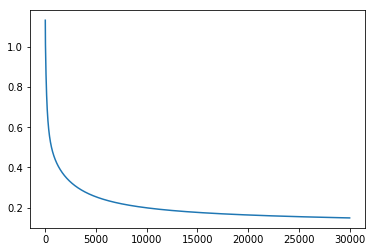

In [39]:
plt.plot(costs)

In [40]:
pred_y.eval()

array([[ 8.62240887e+00,  3.20914602e+00, -1.25461597e+01],
       [ 8.05106926e+00,  3.12505770e+00, -1.18731022e+01],
       [ 7.98537731e+00,  3.08522344e+00, -1.17318287e+01],
       [ 6.68841076e+00,  2.95467114e+00, -1.03317280e+01],
       [ 8.33673954e+00,  3.16710186e+00, -1.22096310e+01],
       [ 7.96247339e+00,  3.20251608e+00, -1.19603910e+01],
       [ 7.19405937e+00,  2.99892521e+00, -1.08635130e+01],
       [ 7.83109093e+00,  3.12284780e+00, -1.16778460e+01],
       [ 6.62271976e+00,  2.91483688e+00, -1.01904554e+01],
       [ 7.54542065e+00,  3.08080363e+00, -1.13413172e+01],
       [ 8.97377110e+00,  3.29102445e+00, -1.30239630e+01],
       [ 6.75410223e+00,  2.99450541e+00, -1.04730024e+01],
       [ 7.76539993e+00,  3.08301377e+00, -1.15365734e+01],
       [ 7.85399580e+00,  3.00555515e+00, -1.14492826e+01],
       [ 1.16333961e+01,  3.59196329e+00, -1.59654379e+01],
       [ 9.83078003e+00,  3.41715693e+00, -1.40335512e+01],
       [ 9.98506927e+00,  3.37953258e+00

In [41]:
pred_y_val = pred_y.eval().argmax(axis=1)
(pred_y_val==iris.target).mean()

0.9466666666666667

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model = LogisticRegression()
model.fit(iris.data[:,[0,2]], iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
model.score(iris.data[:,[0,2]], iris.target)

0.9266666666666666

In [45]:
model.coef_, model.intercept_

(array([[ 1.42009767, -3.0217716 ],
        [-0.54116015,  0.50319206],
        [-2.23750394,  3.20333361]]),
 array([ 0.55552089,  0.50958335, -1.61727257]))

In [46]:
w.eval(), b.eval()

(array([[ 2.8566997 ,  0.42044154, -3.3652935 ],
        [-5.056485  , -0.44254115,  5.317855  ]], dtype=float32),
 array([ 1.1323199,  1.6844518, -2.8281603], dtype=float32))

### 플레이스홀더 적용

In [26]:
X = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,3])

w = tf.Variable(tf.random.normal([2,3], 0, 0.1))
b = tf.Variable(tf.random.normal([3], 0, 0.1))

pred_y = X@w + b
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs = []
tf.global_variables_initializer().run()

for i in range(10000):
    entropy_val, _ = sess.run([entropy, train_op],
                              feed_dict={X: iris.data[:,[0,2]], y: np.eye(3)[iris.target]})
    costs.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 1.3331666
1000 0.44178924
2000 0.35521686
3000 0.30760595
4000 0.27626288
5000 0.25397554
6000 0.23731506
7000 0.22439039
8000 0.21406843
9000 0.20562923
9999 0.19860077


### 학습/테스트 분리

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [87]:
X = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,3])

w = tf.Variable(tf.random.normal([4,3], 0, 0.1))
b = tf.Variable(tf.random.normal([3], 0, 0.1))

pred_y = X@w + b
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs = []
tf.global_variables_initializer().run()

for i in range(20000):
    entropy_val, _ = sess.run([entropy, train_op],
                              feed_dict={X: X_train, y: np.eye(3)[y_train]})
    costs.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 1.6940281
1000 0.34597176
2000 0.26124102
3000 0.21708047
4000 0.18964826
5000 0.17083964
6000 0.15706618
7000 0.1464949
8000 0.13809204
9000 0.13122977
10000 0.12550426
11000 0.1206433
12000 0.11645664
13000 0.112807035
14000 0.10959274
15000 0.10673667
16000 0.10417939
17000 0.10187398
18000 0.099783234
19000 0.09787706
19999 0.09613245


In [50]:
pred_y_train = pred_y.eval(feed_dict={X: X_train, y: np.eye(3)[y_train]})
pred_y_test  = pred_y.eval(feed_dict={X: X_test, y: np.eye(3)[y_test]})

In [51]:
pred_y_train.shape, pred_y_test.shape

((112, 3), (38, 3))

In [52]:
(pred_y_train.argmax(axis=1) == y_train).mean()

0.9732142857142857

In [53]:
(pred_y_test.argmax(axis=1) == y_test).mean()

1.0

- RMSPropOptimizer 적용

In [62]:
X = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,3])

w = tf.Variable(tf.random.normal([4,3], 0, 0.1))
b = tf.Variable(tf.random.normal([3], 0, 0.1))

pred_y = X@w + b
entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = pred_y))

optimizer = tf.train.RMSPropOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs2 = []
tf.global_variables_initializer().run()

for i in range(20000):
    entropy_val, _ = sess.run([entropy, train_op],
                              feed_dict={X: X_train, y: np.eye(3)[y_train]})
    costs2.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 2.088291
1000 0.06274543
2000 0.050984748
3000 0.04779652
4000 0.046297472
5000 0.045428
6000 0.044870086
7000 0.044491272
8000 0.044224583
9000 0.044031892
10000 0.043889962
11000 0.04378376
12000 0.04370335
13000 0.043641847
14000 0.043594453
15000 0.043557566
16000 0.043528803
17000 0.043506224
18000 0.043488413
19000 0.043474317
19999 0.04345553


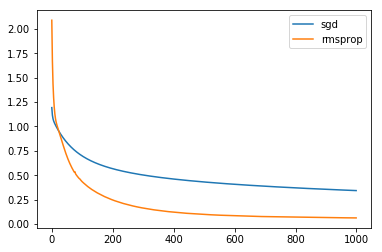

In [64]:
plt.plot(costs[:1000])
plt.plot(costs2[:1000])
plt.legend(['sgd', 'rmsprop'])

In [55]:
pred_y_train = pred_y.eval(feed_dict={X: X_train, y: np.eye(3)[y_train]})
pred_y_test  = pred_y.eval(feed_dict={X: X_test, y: np.eye(3)[y_test]})

In [56]:
pred_y_train.shape, pred_y_test.shape

((112, 3), (38, 3))

In [57]:
(pred_y_train.argmax(axis=1) == y_train).mean()

0.9821428571428571

In [58]:
(pred_y_test.argmax(axis=1) == y_test).mean()

1.0

### 중간층 사용
- 중간층 뉴런 10개
- 중간층 활성화함수는 relu 또는 sigmoid

In [44]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

In [71]:
X = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,3])

w1 = tf.Variable(tf.random.normal([4,10]))
b1 = tf.Variable(tf.random.normal([10]))
y1 = tf.nn.relu(X@w1 + b1)

w2 = tf.Variable(tf.random.normal([10,3]))
b2 = tf.Variable(tf.random.normal([3]))
pred_y = y1@w2 + b2

entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs = []
tf.global_variables_initializer().run()

for i in range(20000):
    entropy_val, _ = sess.run([entropy, train_op],
                              feed_dict={X: X_train, y: np.eye(3)[y_train]})
    costs.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 9.838471
1000 0.29889578
2000 0.14235799
3000 0.09874572
4000 0.08204736
5000 0.07367972
6000 0.068767235
7000 0.06556055
8000 0.063292325
9000 0.061583247
10000 0.06022855
11000 0.059110943
12000 0.058159683
13000 0.057330232
14000 0.05659371
15000 0.05593052
16000 0.055327058
17000 0.054773416
18000 0.05426234
19000 0.053788237
19999 0.053347044


In [72]:
X = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,3])

w1 = tf.Variable(tf.random.normal([4,10]))
b1 = tf.Variable(tf.random.normal([10]))
y1 = tf.nn.sigmoid(X@w1 + b1)

w2 = tf.Variable(tf.random.normal([10,3]))
b2 = tf.Variable(tf.random.normal([3]))
pred_y = y1@w2 + b2

entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs2 = []
tf.global_variables_initializer().run()

for i in range(20000):
    entropy_val, _ = sess.run([entropy, train_op],
                              feed_dict={X: X_train, y: np.eye(3)[y_train]})
    costs2.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 3.4631712
1000 0.59719056
2000 0.42735103
3000 0.33897394
4000 0.2764888
5000 0.22969283
6000 0.19526942
7000 0.1700882
8000 0.1514859
9000 0.13749467
10000 0.12675022
11000 0.11832513
12000 0.11158784
13000 0.10610257
14000 0.1015638
15000 0.09775324
16000 0.094512224
17000 0.09172321
18000 0.08929799
19000 0.08716909
19999 0.085286126


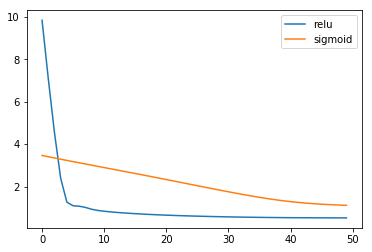

In [75]:
plt.plot(costs[:50])
plt.plot(costs2[:50])
plt.legend(['relu', 'sigmoid'])

In [66]:
pred_y_train = pred_y.eval(feed_dict={X: X_train, y: np.eye(3)[y_train]})
(pred_y_train.argmax(axis=1) == y_train).mean()

0.9821428571428571

In [67]:
pred_y_test  = pred_y.eval(feed_dict={X: X_test, y: np.eye(3)[y_test]})
(pred_y_test.argmax(axis=1) == y_test).mean()

1.0

- 중간층 뉴런갯수가 5=>10=>10=>5 가 되도록 4개층으로 구성

In [76]:
X = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,3])

w1 = tf.Variable(tf.random.normal([4,5]))
b1 = tf.Variable(tf.random.normal([5]))
y1 = tf.nn.relu(X@w1 + b1)

w2 = tf.Variable(tf.random.normal([5,10]))
b2 = tf.Variable(tf.random.normal([10]))
y2 = tf.nn.relu(y1@w2 + b2)

w3 = tf.Variable(tf.random.normal([10,10]))
b3 = tf.Variable(tf.random.normal([10]))
y3 = tf.nn.relu(y2@w3 + b3)

w4 = tf.Variable(tf.random.normal([10,5]))
b4 = tf.Variable(tf.random.normal([5]))
y4 = tf.nn.relu(y3@w4 + b4)

w5 = tf.Variable(tf.random.normal([5,3]))
b5 = tf.Variable(tf.random.normal([3]))
pred_y = y4@w5 + b5

entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = pred_y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train_op = optimizer.minimize(entropy)

costs3 = []
tf.global_variables_initializer().run()

for i in range(20000):
    entropy_val, _ = sess.run([entropy, train_op],
                              feed_dict={X: X_train, y: np.eye(3)[y_train]})
    costs3.append(entropy_val)
    if i%1000==0: print(i, entropy_val)
        
print(i, entropy_val)

0 66.73725
1000 0.21095045
2000 0.11372528
3000 0.084860325
4000 0.07166528
5000 0.06446146
6000 0.06631708
7000 0.06317768
8000 0.061067093
9000 0.059288535
10000 0.057804417
11000 0.056552768
12000 0.055488426
13000 0.054574747
14000 0.05378099
15000 0.053085975
16000 0.052473836
17000 0.05192926
18000 0.05144143
19000 0.051002257
19999 0.049992613


In [77]:
pred_y_train = pred_y.eval(feed_dict={X: X_train, y: np.eye(3)[y_train]})
(pred_y_train.argmax(axis=1) == y_train).mean()

0.9642857142857143

In [79]:
pred_y_test  = pred_y.eval(feed_dict={X: X_test, y: np.eye(3)[y_test]})
(pred_y_test.argmax(axis=1) == y_test).mean()

0.9736842105263158

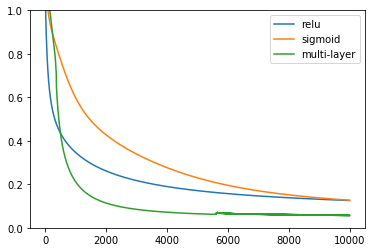

In [88]:
plt.plot(costs[:10000])
plt.plot(costs2[:10000])
plt.plot(costs3[:10000])
plt.ylim(0,1)
plt.legend(['relu', 'sigmoid', 'multi-layer'])

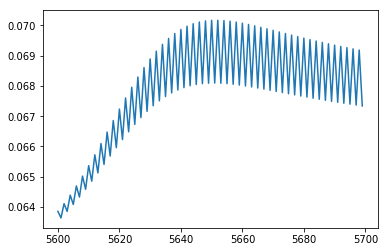

In [94]:
plt.plot(range(5600,5700),costs3[5600:5700])